In [2]:
from __future__ import division
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats
import random
import tqdm
import pandas as pd
from collections import OrderedDict,Counter
import matplotlib.pyplot as plt
import heapq
import pickle
import math
import seaborn as sns
from matplotlib import pylab
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

### SORN 1 Model Analysis:

#### Connection connection dynamics 
#### Histogram of incoming and outgoing connection numbers 
#### Population activity/ Fraction of active units/time step 
#### Spike rate neurons 
#### Spike train plot with firing rate of network
#### Firing rate Smoothness measure
#### Number of active units per timestep
#### Average Correlation coefficient between neurons
#### ISI with Exponential fit 
#### ISI-CV
#### Histogram of weight strengths in SORN at 10000th time step and their distribution fit

#### NOTE: Hamming distance, Spike source entropy, Fano factor are in different notebook



### Unpickle simulation matrices for analysis


In [3]:
with open('conn_2009_all.pkl','rb') as f:  
    conn2009_all = pickle.load(f)
    
with open('conn_2009_NoIP.pkl','rb') as f:
    conn2009_NoIP = pickle.load(f)
       
with open('conn_2009_NoSN.pkl','rb') as f:  
    conn2009_NoSN = pickle.load(f)
    
with open('conn_2013_all.pkl','rb') as f:  
    conn2013_all = pickle.load(f)
    
with open('conn_2018_NOIP.pkl','rb') as f:  
    conn2013_NoIP = pickle.load(f)
    
with open('conn_2013_NoSN.pkl','rb') as f:  
    conn2013_NoSN = pickle.load(f)
    
with open('conn_2013_NoiSTDP.pkl','rb') as f:  
    conn2013_NoiSTDP = pickle.load(f)

    
# with open('stdp2013_100k.pkl','rb') as f:  
#     all_matrices1, X,frac_ee_conn6 = pickle.load(f)
    
# with open('stdp2013_150k.pkl','rb') as f:  
#     all_matrices1, X,frac_ee_conn7 = pickle.load(f)
    
# with open('stdp2013_200k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn8 = pickle.load(f)  
    
# with open('stdp2013_290k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn9 = pickle.load(f)     
    
# with open('stdp2013_380k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn10 = pickle.load(f)  

# with open('stdp2013_470k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn11 = pickle.load(f) 
    
# with open('stdp2013_500k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn12 = pickle.load(f)
    
# with open('stdp2013_590k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn13 = pickle.load(f)
    
# with open('stdp2013_680k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn14 = pickle.load(f)

# with open('stdp2013_770k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn15 = pickle.load(f)
    
# with open('stdp2013_860k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn16 = pickle.load(f)
    
# with open('stdp2013_950k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn17 = pickle.load(f)
    
# with open('stdp2013_1000k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn18 = pickle.load(f)
    
# with open('stdp2013_1090k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn19 = pickle.load(f)
    
# with open('stdp2013_1180k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn20 = pickle.load(f)
    
# with open('stdp2013_1270k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn21 = pickle.load(f)
    
# with open('stdp2013_1360k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn22 = pickle.load(f)
    
# with open('stdp2013_1450k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn23 = pickle.load(f)
    
# with open('stdp2013_1540k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn24 = pickle.load(f)
    
# with open('stdp2013_1630k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn25 = pickle.load(f)
    
# with open('stdp2013_1720k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn26 = pickle.load(f)
    
# with open('stdp2013_1810k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn27 = pickle.load(f)
    
# with open('stdp2013_1900k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn28 = pickle.load(f)
    
# with open('stdp2013_1950k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn29 = pickle.load(f)
    
# with open('stdp2013_2000k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn30 = pickle.load(f)
    
# with open('stdp2013_2090k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn31 = pickle.load(f)
    
# with open('stdp2013_2180k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn32 = pickle.load(f)
    
# with open('stdp2013_2270k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn33 = pickle.load(f)
    
# with open('stdp2013_2360k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn34 = pickle.load(f)

# with open('stdp2013_2450k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn35 = pickle.load(f)
    
# with open('stdp2013_2540k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn36 = pickle.load(f)
    
# with open('stdp2013_2630k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn37 = pickle.load(f)
    
# with open('stdp2013_2720k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn38 = pickle.load(f)
    
# with open('stdp2013_2810k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn39 = pickle.load(f)
    
# with open('stdp2013_2900k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn40 = pickle.load(f)
    
# with open('stdp2013_3000k.pkl','rb') as f:  
#     all_matrices, X,frac_ee_conn41 = pickle.load(f)

### Number of incoming and outgoing connections

In [9]:
with open('stdp2009_50k_all.pkl','rb') as f:  
    plastic_matrices,X_all,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)
    
    
weights = plastic_matrices['Wee']

num_incoming_weights = np.sum(np.array(weights) > 0, axis=0)
num_outgoing_weights = np.sum(np.array(weights) > 0, axis=1)

print(np.unique(num_incoming_weights))
print(np.unique(num_outgoing_weights))

[ 1  2  3  4  5  6  7  8  9 11]
[0 1 2 3 4 5 6 7 8 9]


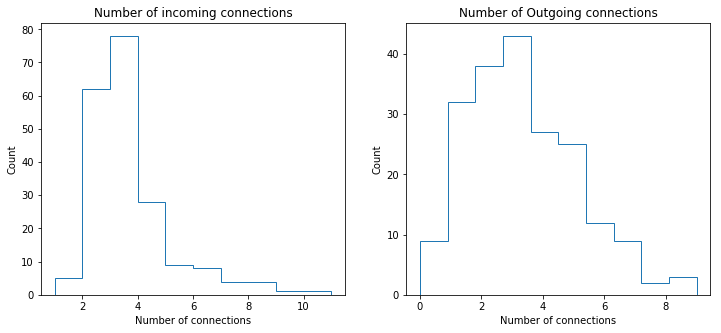

In [10]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.set_title('Number of incoming connections')
ax.set_xlabel('Number of connections')
ax.set_ylabel('Count')
ax.hist(num_incoming_weights, bins = 10,histtype = 'step')
ax2.hist(num_outgoing_weights,bins = 10,histtype = 'step')
ax2.set_title('Number of Outgoing connections')
ax2.set_xlabel('Number of connections')
ax2.set_ylabel('Count')
plt.show()

#### Guassian fit for histogram of number of incoming connections(Pre- synapses)

c:\users\saran\appdata\local\conda\conda\envs\tensor\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


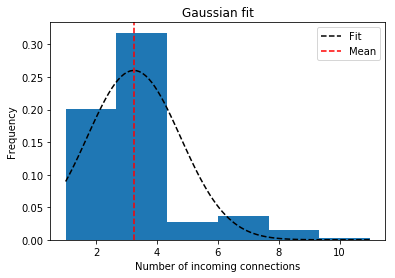

In [11]:
# Empirical average and variance are computed
avg = np.mean(num_incoming_weights)
var = np.var(num_incoming_weights)
# From hist plot above, it is clear that connection count follow gaussian distribution
pdf_x = np.linspace(np.min(num_incoming_weights),np.max(num_incoming_weights),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)

# Then we plot :
plt.figure()
plt.hist(num_incoming_weights,bins= 6,normed=True)
plt.plot(pdf_x,pdf_y,'k--',label = 'Fit')
plt.title('Gaussian fit')
plt.xlabel('Number of incoming connections')
plt.ylabel('Frequency')
plt.axvline(x=avg, color='r', linestyle='--',label = 'Mean')
plt.legend()
plt.show()

### Network connection dynamics: decay and stable phases

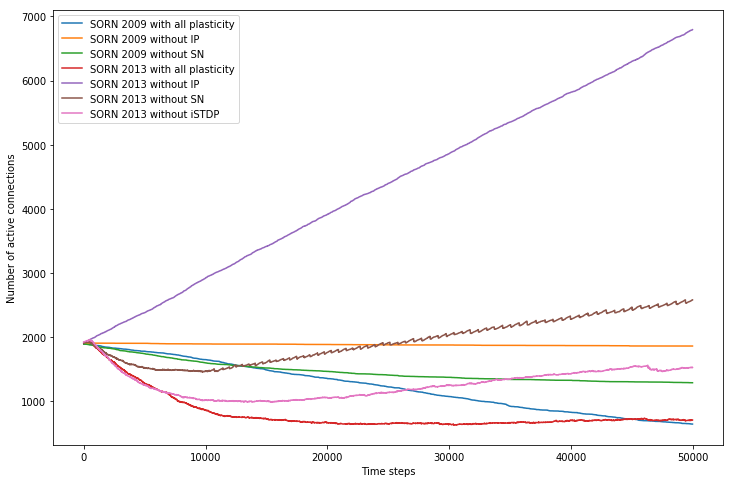

In [12]:
plt.figure(figsize = (12,8))
plt.plot(conn2009_all,label = 'SORN 2009 with all plasticity')
plt.plot(conn2009_NoIP,label = 'SORN 2009 without IP')
plt.plot(conn2009_NoSN,label = 'SORN 2009 without SN')
plt.plot(conn2013_all,label = 'SORN 2013 with all plasticity')
plt.plot(conn2013_NoIP,label = 'SORN 2013 without IP')
plt.plot(conn2013_NoSN,label = 'SORN 2013 without SN')
plt.plot(conn2013_NoiSTDP,label = 'SORN 2013 without iSTDP')
plt.legend()
plt.xlabel('Time steps')
plt.ylabel('Number of active connections')
plt.savefig('connection_dynamics.png')
plt.show()

## Firing rate of entire network 
#### Spikes per time step: Should be unimodel as in paper 1

    

In [13]:
## READ ALL THE SIMULATION MATRICES


with open('stdp2009_50k_all.pkl','rb') as f:  
    plastic_matrices,X_all1,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)
    
with open('stdp2009_50k_NoIP.pkl','rb') as f:  
    plastic_matrices,X_all2,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)
    
with open('stdp2009_50k_NoSN.pkl','rb') as f:  
    plastic_matrices,X_all3,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)
    
with open('stdp2013_50k_all.pkl','rb') as f:  
    plastic_matrices4,X_all4,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)
    
with open('stdp2013_50k_NoIP.pkl','rb') as f:  
    plastic_matrices,X_all5,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)
    
with open('stdp2013_50k_NoSN.pkl','rb') as f:  
    plastic_matrices,X_all6,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)
    
with open('stdp2013_50k_NoiSTDP.pkl','rb') as f:  
    plastic_matrices,X_all7,Y_all,R_all,frac_pos_active_conn5 = pickle.load(f)

    
       
    

In [14]:

spike_train1 = np.asarray(X_all1)
spike_train2 = np.asarray(X_all2)
spike_train3 = np.asarray(X_all3)
spike_train4 = np.asarray(X_all4)
spike_train5 = np.asarray(X_all5)
spike_train6 = np.asarray(X_all6)
spike_train7 = np.asarray(X_all7)

# X - axis; Neurons
# Y - axis; time_steps


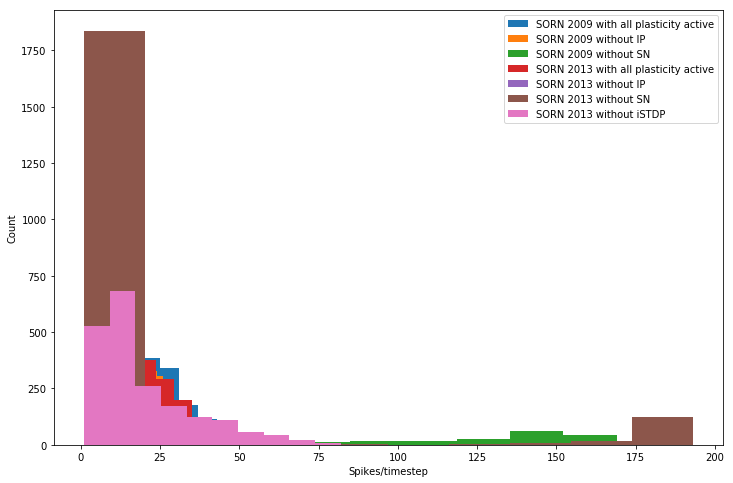

In [15]:
def firing_rate_network(spike_train):    
    
    firing_rates = np.count_nonzero(spike_train,1)
    
    # Filter zero entries in firing rate list above
    firing_rates = list(filter(lambda a: a != 0, firing_rates))

    return firing_rates

fr1 = firing_rate_network(spike_train1[8000:10000])
fr2 = firing_rate_network(spike_train2[8000:10000])
fr3 = firing_rate_network(spike_train3[8000:10000])
fr4 = firing_rate_network(spike_train4[8000:10000])
fr5 = firing_rate_network(spike_train5[8000:10000])
fr6 = firing_rate_network(spike_train6[8000:10000])
fr7 = firing_rate_network(spike_train7[8000:10000])



plt.figure(figsize = (12,8))

# plt.title('Distribution of population activity without inactive timesteps')
plt.xlabel('Spikes/timestep')
plt.ylabel('Count')

plt.hist(fr1,10,histtype = 'stepfilled',label = 'SORN 2009 with all plasticity active')
plt.hist(fr2,10,histtype = 'stepfilled',label = 'SORN 2009 without IP')
plt.hist(fr3,10,histtype = 'stepfilled',label = 'SORN 2009 without SN')
plt.hist(fr4,10,histtype = 'stepfilled',label = 'SORN 2013 with all plasticity active')
plt.hist(fr5,10,histtype = 'stepfilled',label = 'SORN 2013 without IP ')
plt.hist(fr6,10,histtype = 'stepfilled',label = 'SORN 2013 without SN')
plt.hist(fr7,10,histtype = 'stepfilled',label = 'SORN 2013 without iSTDP')

plt.legend()
plt.savefig('Spikespertimestep.png') 
plt.show()
  
        

In [16]:
### Stacked Firing rates

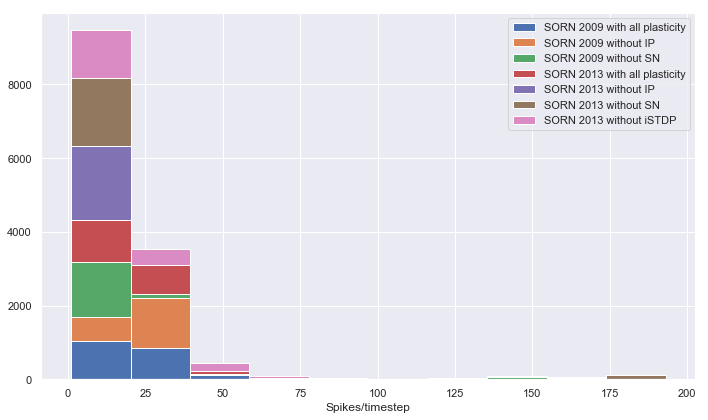

In [17]:
import seaborn as sns
 
# plot
sns.set()
plt.figure(figsize = (10,6))
plt.hist([fr1,fr2,fr3,fr4,fr5,fr6,fr7],bins=10, stacked=True)
plt.legend(['SORN 2009 with all plasticity','SORN 2009 without IP','SORN 2009 without SN','SORN 2013 with all plasticity',
           'SORN 2013 without IP','SORN 2013 without SN','SORN 2013 without iSTDP'],
           ncol=1, loc='upper right')

plt.xlabel('Spikes/timestep')
plt.tight_layout()
plt.savefig('FiringcountStackedHist')
plt.show()

In [18]:
df = pd.DataFrame({'1':pd.Series(fr1),'2':pd.Series(fr2),'3':pd.Series(fr3),'4':pd.Series(fr4),'5':pd.Series(fr5),
                   '6':pd.Series(fr6),'7':pd.Series(fr7)})

c:\users\saran\appdata\local\conda\conda\envs\tensor\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
c:\users\saran\appdata\local\conda\conda\envs\tensor\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


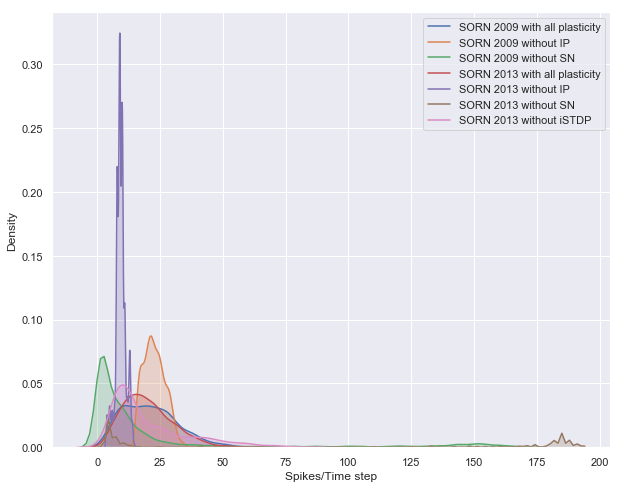

In [19]:
plt.figure(figsize = (10,8))


for col in '1234567':
    
    sns.kdeplot(df[col],shade= True)    
plt.legend(['SORN 2009 with all plasticity','SORN 2009 without IP','SORN 2009 without SN','SORN 2013 with all plasticity',
           'SORN 2013 without IP','SORN 2013 without SN','SORN 2013 without iSTDP'],
           ncol=1, loc='upper right')

plt.xlabel('Spikes/Time step')
plt.ylabel('Density')
plt.savefig('HistFiringcount')

## Distribution of Firing rate: Paper 1

In [20]:
def firing_rate_neuron(X_all,neuron,time_step):
    
    """ Measure spike rate of given neuron during given time window"""
    time_period = len(X_all[:,0])
    
    neuron_spike_train = X_all[:,neuron]
    
    # Split the list(neuron_spike_train) into sublists of lenth time_step
    samples_spike_train = [neuron_spike_train[i:i+time_step] for i  in range(0, len(neuron_spike_train), time_step)]
    
    spike_rate = 0.
    
    for idx,spike_train in enumerate(samples_spike_train):
        spike_rate += list(spike_train).count(1.)
        
        
    spike_rate = spike_rate*time_step/time_period
    
    # print('Firing rate of neuron %s in %s time steps is %s' %(neuron,time_step,spike_rate/time_step))
    
    return time_period, time_step,spike_rate


_,_,spike_rate=firing_rate_neuron(spike_train1[0:10000],60,10)  # Neuron 60; time window size 10 # As per target firing rate
spike_rate

1.009

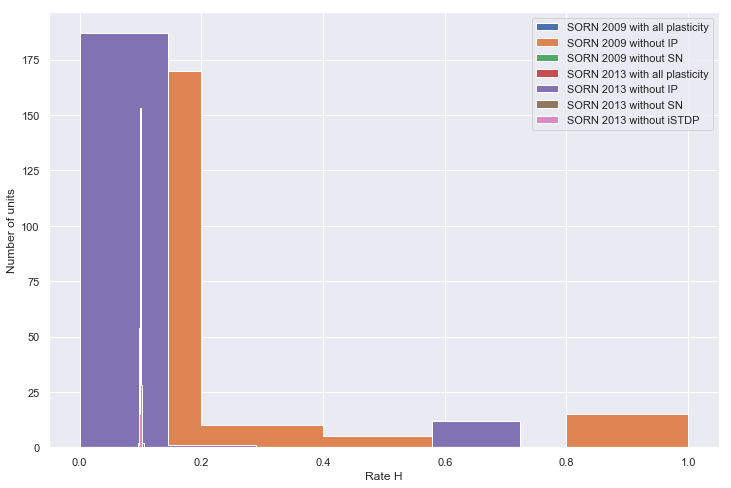

In [21]:
def firing_rate_h(spike_train):
    frs = []
    for i in range(200):
        _,_,fr = firing_rate_neuron(spike_train[0:10000],i,10)
        frs.append(fr/10)
        
    return frs


frs1 = firing_rate_h(spike_train1)
frs2 = firing_rate_h(spike_train2)
frs3 = firing_rate_h(spike_train3)
frs4 = firing_rate_h(spike_train4)
frs5 = firing_rate_h(spike_train5)
frs6 = firing_rate_h(spike_train6)
frs7 = firing_rate_h(spike_train7)


plt.figure(figsize=(12,8))
# plt.title('Distribution of firing rates')
plt.xlabel('Rate H')
plt.ylabel('Number of units')
plt.hist(frs1,5,histtype = 'stepfilled',label = 'SORN 2009 with all plasticity')
plt.hist(frs2,5,histtype = 'stepfilled',label = 'SORN 2009 without IP')
plt.hist(frs3,5,histtype = 'stepfilled',label = 'SORN 2009 without SN')
plt.hist(frs4,5,histtype = 'stepfilled',label = 'SORN 2013 with all plasticity')
plt.hist(frs5,5,histtype = 'stepfilled',label = 'SORN 2013 without IP')
plt.hist(frs6,5,histtype = 'stepfilled',label = 'SORN 2013 without SN')
plt.hist(frs7,5,histtype = 'stepfilled',label = 'SORN 2013 without iSTDP')
plt.legend()
plt.savefig('FiringRateH.png')
plt.show()


In [22]:
df = pd.DataFrame({'1':frs1,'2':frs2,'3':frs3,'4':frs4,'5':frs5,'6':frs6,'7':frs7})

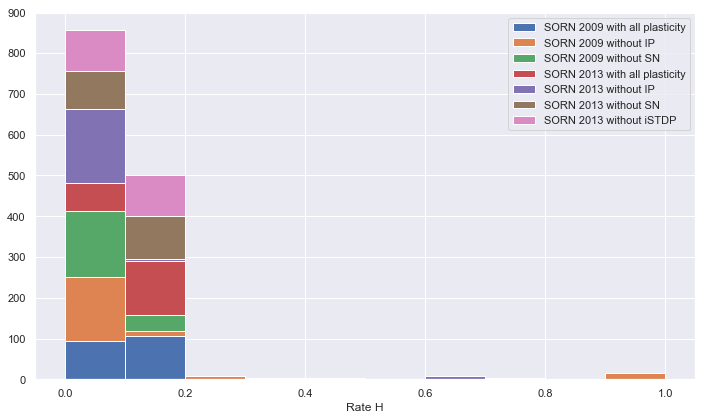

In [23]:
import seaborn as sns
 
# plot
sns.set()
plt.figure(figsize = (10,6))
plt.hist([frs1,frs2,frs3,frs4,frs5,frs6,frs7],bins=10, stacked=True)
plt.legend(['SORN 2009 with all plasticity','SORN 2009 without IP','SORN 2009 without SN','SORN 2013 with all plasticity',
           'SORN 2013 without IP','SORN 2013 without SN','SORN 2013 without iSTDP'],
           ncol=1, loc='upper right')

plt.xlabel('Rate H')
plt.tight_layout()
plt.savefig('FiringrateStackedHist')
plt.show()


### Plot Spike train

In [24]:
# Get the indices where spike_train is 1
x,y = np.argwhere(spike_train1[9800:10000].T == 1).T


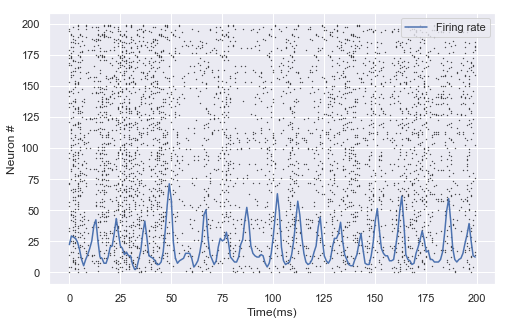

In [25]:

def _scatter_plot(x,y,firing_rates):
    
    plt.figure(figsize = (8,5))
    plt.scatter(y,x, s= 0.1,color = 'black')
    # plt.plot(y,x,'|b')
    # plt.gca().invert_yaxis()
    plt.plot(firing_rates,label = 'Firing rate')
    plt.xlabel('Time(ms)')
    plt.ylabel('Neuron #')
    plt.legend(loc = 'upper right')
    plt.savefig('SpikeTrain.png')
    plt.show()

def _raster_plot(x,y,firing_rates):
    
    plt.figure(figsize = (11,6))
    plt.plot(y,x,'|r')
    plt.plot(firing_rates,label = 'Firing rate')
    # plt.gca().invert_yaxis()
    plt.xlabel('Time(ms)')
    plt.ylabel('Neuron #')
    plt.legend(loc = 'upper right')
    plt.savefig('SpikeTrain.png')
    plt.show()

fr = firing_rate_network(spike_train7[9800:10000])

_scatter_plot(x,y,fr)
# # _raster_plot(x,y,fr)


## Smoothness firing rate time series

#### Scale dependent method

Smaller values corresponds to smoother series

In [26]:
def scale_dependent_smoothness_measure(firing_rates):
    
    """
    Args:
    
    firing_rates - List of number of active neurons per time step
    
    Returns:
    
    sd_diff - Float value signifies the smoothness of the sementic changes in firing rates
    """
    
    diff = np.diff(firing_rates)
    sd_diff = np.std(diff)
    
    return sd_diff
    

#### Scale independent measure
Smaller values corresponds to smoother series

In [27]:
def scale_independent_smoothness_measure(firing_rates):
    
    """
    Args:
    
    firing_rates - List of number of active neurons per time step
    
    Returns:
    
    coeff_var - Float value signifies the smoothness of the sementic changes in firing rates
    """
    
    diff = np.diff(firing_rates)
    mean_diff = np.mean(diff)
    sd_diff = np.std(diff)
    
    coeff_var = sd_diff/abs(mean_diff)
    
    return coeff_var
    

#### Using one-lag autocorrelation measure

In [28]:
def autocorr(fr,t=2):
    return np.corrcoef(np.array([fr[0:len(fr)-t], fr[t:len(fr)]]))

In [29]:
print('smoothness measure using scale_dependent_smoothness_measure',scale_dependent_smoothness_measure(fr[0:200]))

print('smoothness measure using scale_independent_smoothness_measure',scale_independent_smoothness_measure(fr[0:200]))
print('smoothness measure using one-lag auto correlation \n',autocorr(fr[0:200]))


smoothness measure using scale_dependent_smoothness_measure 9.684857757660486
smoothness measure using scale_independent_smoothness_measure 192.72866937744368
smoothness measure using one-lag auto correlation 
 [[1.         0.28149984]
 [0.28149984 1.        ]]


## Average Correlation coefficient between neurons 

Average correlation coeffecient between neurons in excitatory pool is 0.015260157146247889


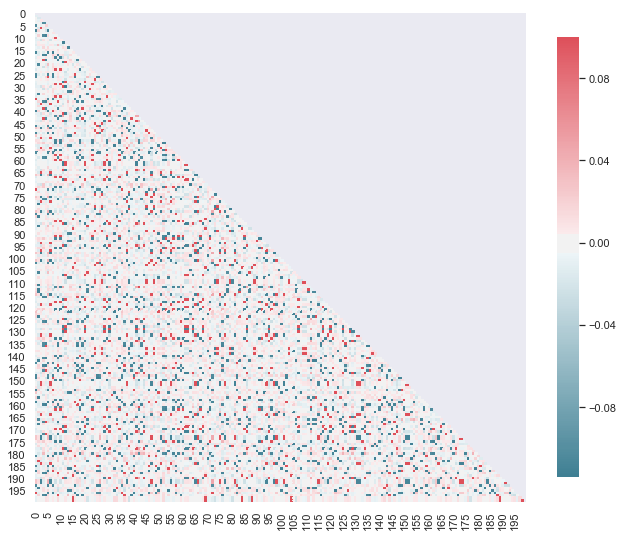

In [30]:
def avg_corr_coeff(spike_train):
    
    """Measure Average Pearson correlation coeffecient between neurons"""
    
    corr_mat = np.corrcoef(np.asarray(spike_train).T)
    avg_corr = np.sum(corr_mat,axis = 1) / 200
    corr_coeff = avg_corr.sum()/200/2 ; # 2D to 1D and either upper  or lower half of correlation matrix. 
    
    print('Average correlation coeffecient between neurons in excitatory pool is', corr_coeff)
    
    return corr_mat,corr_coeff


# PLOT THE CORRELATION BETWEEN EXCITATORY NEURONS

def plot_correlation(corr):
    
    """ Plot correlation between neurons"""
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))

    # Custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    return sns.heatmap(corr, mask=mask, cmap=cmap,xticklabels=5, yticklabels=5, vmax=.1, center=0,
                square=False, linewidths=0.0, cbar_kws={"shrink": .9})


corr, avg_corr = avg_corr_coeff(spike_train1[0:10000])
plot_correlation(corr)

In [32]:
spike_train = spike_train4.copy()

## Exponential fit of Spike time interval

### Exponential fit used first 10000 time steps of network activity
### At 100000 times steps network shows log normal pattern in activity 

In [33]:

# with open('stdp2009_50k.pkl','rb') as f:  
#     plastic_matrices,X_all,Y_all,R_all,frac_pos_active_conn = pickle.load(f)

# spike_train = np.asarray(X_all)
def spike_times(x):
    
    """ Get the time instants at which neuron spikes"""
    
    times = np.where(x == 1.)
    
    return times


In [34]:
def spike_time_intervals(spike_times):
    
    """ Generate spike time intervals|spike_times"""
    
    # isi = sorted(np.diff(spike_times)[-1])
    isi = np.diff(spike_times)[-1]
    return isi

In [35]:
# Define required parameters

y_all,x_all = [],[]

for i in range(200):
    
    spike_time = spike_times(spike_train[0:20000].T[i])  # Locate the spike time of neuron 60 from its spike train
    isi = spike_time_intervals(spike_time)      # ISI intervals of neuron 
    bin_size = 19
    y, x = np.histogram(sorted(isi),bins = bin_size)
    y_all.extend(y)
    x_all.extend(x)



In [36]:
len(y_all[1:bin_size])


18

In [37]:
len(x_all[1:bin_size])

18

c:\users\saran\appdata\local\conda\conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
c:\users\saran\appdata\local\conda\conda\envs\tensor\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


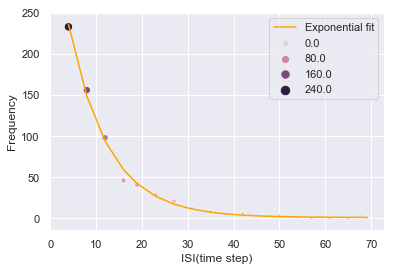

In [39]:
def isi_exponential_fit(x,y,bin_size):
    
    x = [int(i) for i in x]
    y = [float(i) for i in y]

    def exponential_func(y, a, b, c):
        return a*np.exp(-b* np.array(y)) - c

    # Curve fit
    popt, pcov = curve_fit(exponential_func, x[1:bin_size], y[1:bin_size])
    
    # Plot
    plt.plot(x[1:bin_size], exponential_func(x[1:bin_size], *popt),color = 'orange', label = 'Exponential fit')
    # plt.scatter(x[1:bin_size],y[1:bin_size], s= 2.0,color = 'black',label = 'ISI')
    sns.scatterplot(x[1:bin_size],y[1:bin_size],color = 'green',size = y[1:bin_size],hue = y[1:bin_size])
    plt.xlabel('ISI(time step)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.savefig('ISI')
    plt.show()

isi_exponential_fit(x,y,bin_size)



In [40]:
df = pd.DataFrame({'x':x[1:19],'y':y[1:19]},columns=['x','y'])

In [41]:
df.size

36

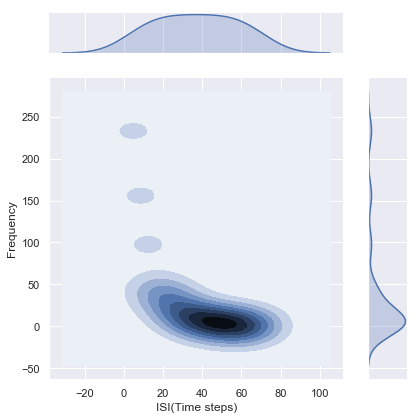

In [42]:
import seaborn as sns

h = sns.jointplot(x="x", y="y", data=df, kind="kde")
# or set labels via the axes objects
h.ax_joint.set_xlabel('ISI(Time steps)')
h.ax_joint.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('ISIDensity')
plt.show()

### Ditribution of weights using histogram plot

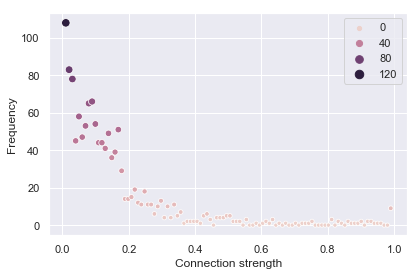

In [44]:
weight_strengths = plastic_matrices['Wee']
weights = np.array(weight_strengths.tolist())
weights = weights[weights >= 0.01]  # Remove the weight values less than 0.01 # As reported in article SORN 2013
y,x = np.histogram(weights, bins = 100)  # Create histogram and the bin size 100 

h = sns.scatterplot(x[:-1],y,color = 'orange',size = y,hue = y)

# or set labels via the axes objects
# h.ax_joint.set_xlabel('Connection strength')
# h.ax_joint.set_ylabel('Frequency')
plt.xlabel('Connection strength')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('HistWeights')
plt.show()


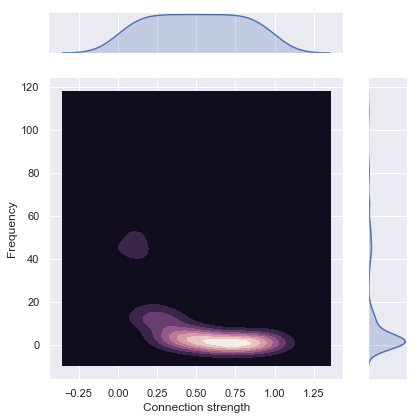

In [45]:
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

h = sns.jointplot(x="x", y="y",cmap=cmap, data={'x':x[:-1],'y':y}, kind="kde")
# or set labels via the axes objects
h.ax_joint.set_xlabel('Connection strength')
h.ax_joint.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('WeightsDensity')
plt.show()

## Linear and lognormal fit of weight distribution

###### Reference: # http://nbviewer.jupyter.org/url/xweb.geos.ed.ac.uk/~jsteven5/blog/lognormal_distributions.ipynb

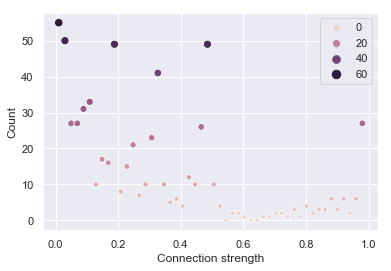

In [46]:
weight_strengths = plastic_matrices4['Wee']
weights = np.array(weight_strengths.tolist())
weights = weights[weights >= 0.01]  # Remove the weight values less than 0.01 # As reported in article SORN 2
y,x = np.histogram(weights, bins = 50)  # Create histogram and the bin size 10 which captures a avg firing rate 0.1

# plt.scatter(x[:-1],y,s = 1.0,c ='black')
h = sns.scatterplot(x[:-1],y,color = 'orange',size = y,hue = y,cmap = cmap)
plt.xlabel('Connection strength')
plt.ylabel('Count')
plt.savefig('Connection strenths Sca')
plt.show()

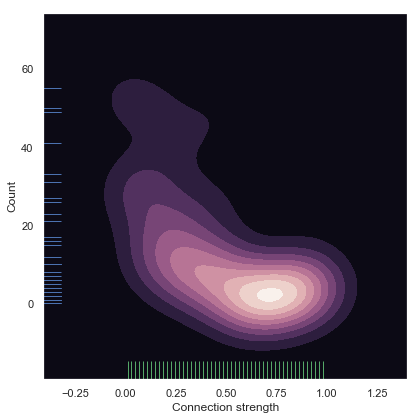

In [47]:
import seaborn as sns

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

# h = sns.jointplot(x="x", y="y",cmap=cmap, data={'x':x[:-1],'y':y}, kind="kde")
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(x[:-1], y,cmap=cmap,shade= True, ax=ax)
sns.rugplot(x[:-1], color="g", ax=ax)
sns.rugplot(y, vertical=True, ax=ax);
plt.xlabel('Connection strength')
plt.ylabel('Count')
# or set labels via the axes objects
# h.ax_joint.set_xlabel('Connection strength')
# h.ax_joint.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('NumberWeightsDensity')
plt.show()

c:\users\saran\appdata\local\conda\conda\envs\tensor\lib\site-packages\matplotlib\axes\_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
c:\users\saran\appdata\local\conda\conda\envs\tensor\lib\site-packages\matplotlib\axes\_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


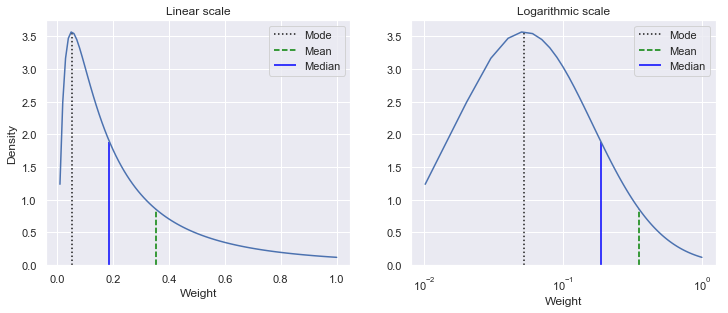

In [48]:
X= weights.copy() 

M = float(np.mean(X))  # Geometric mean
s = float(np.std(X))   # Geometric standard deviation

# Lognormal distribution parameters

mu = float(np.mean(np.log(X))) # Mean of log(X)
sigma = float(np.std(np.log(X))) # Standard deviation of log(X)
shape = sigma # Scipy's shape parameter
scale = np.exp(mu) # Scipy's scale parameter
median = np.exp(mu)

mode = np.exp(mu - sigma**2) # Note that mode depends on both M and s
mean = np.exp(mu + (sigma**2/2)) # Note that mean depends on both M and s
x = np.linspace(min(weights),max(weights) , num=100) # values for x-axis

pdf = stats.lognorm.pdf(x, shape, loc=0, scale=scale) # probability distribution

plt.figure(figsize=(12,4.5))

# Figure on linear scale
plt.subplot(121)
plt.plot(x, pdf)

plt.vlines(mode, 0, pdf.max(), linestyle=':', label='Mode')
plt.vlines(mean, 0, stats.lognorm.pdf(mean, shape, loc=0, scale=scale), linestyle='--', color='green', label='Mean')
plt.vlines(median, 0, stats.lognorm.pdf(median, shape, loc=0, scale=scale), color='blue', label='Median')
plt.ylim(ymin=0)
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Linear scale')
leg=plt.legend()

# Figure on logarithmic scale
plt.subplot(122)
plt.semilogx(x, pdf)

plt.vlines(mode, 0, pdf.max(), linestyle=':', label='Mode')
plt.vlines(mean, 0, stats.lognorm.pdf(mean, shape, loc=0, scale=scale), linestyle='--', color='green', label='Mean')
plt.vlines(median, 0, stats.lognorm.pdf(median, shape, loc=0, scale=scale), color='blue', label='Median')
plt.ylim(ymin=0)
plt.xlabel('Weight')
plt.title('Logarithmic scale')
plt.savefig('WeightsLogscale55timesteps')
leg=plt.legend()